In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib
%matplotlib inline

In [46]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)


About Dataset


- Customer_id = unique customer id
- Age = customer's age
- Gender = 0: Male, 1: Female
- Revenue_Total = total sales by customer
- N_Purchases = number of purchases to date
- Purchase_DATE = date latest purchase, dd.mm.yy
- Purchase_VALUE = latest purchase in €
- Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
- Time_Spent = time spent (in sec) on website
- Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
- Newsletter = 0: not subscribed, 1: subscribed
- Voucher = 0: not used, 1: used

Task

Customer segmentation: You can use clustering algorithms to group customers based on their demographic information, purchasing behavior, and other variables. This can help you identify different customer segments and tailor your marketing and sales strategies accordingly.

Sales forecasting: You can use time series analysis or regression models to predict future sales based on historical data. This can help you plan inventory levels, marketing campaigns, and staffing needs.

Customer churn analysis: You can identify customers who are at risk of churning (i.e., stopping purchases) based on their purchasing behavior and other variables. This can help you target retention efforts to retain these customers.

Purchase behavior analysis: You can analyze purchasing behavior (e.g., average purchase value, number of purchases, purchase frequency) to identify patterns and trends. This can help you optimize pricing strategies and product offerings.

Customer lifetime value (CLV) analysis: You can use historical data on customer revenue and purchase behavior to estimate the expected future revenue from each customer. This can help you prioritize customer acquisition and retention efforts based on their potential long-term value.

Website behavior analysis: You can analyze variables such as time spent on website, browser used, and payment method to identify factors that influence customer behavior. This can help you optimize website design and payment options to improve the customer experience.

Newsletter and voucher analysis: You can analyze the effectiveness of your newsletter and voucher campaigns in driving sales and customer engagement. This can help you optimize these campaigns to improve their impact.

Clean The Data

In [26]:
df = pd.read_csv("Online Shop Customer Sales Data.csv")

df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [27]:
df.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

Changing The Value

In [28]:
df['Gender'] = df['Gender'].map({1 : 'Female', 0 : 'Male'})
df['Pay_Method'] = df['Pay_Method'].map({0 : 'Digital Wallets', 1 : 'Card', 2 : 'PayPal', 3 : 'Other'})
df['Browser'] = df['Browser'].map({0 : 'Chrome', 1 : 'Safari', 2 : 'Edge', 3 : 'Other'})
df['Newsletter'] = df['Newsletter'].map({0 : 'Not Subscribed', 1 : 'Subscribed'})
df['Voucher'] = df['Voucher'].map({0 : 'Not Used', 1 : 'Used'})


df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,Male,45.3,2,22.06.21,24.915,Card,885,Chrome,Not Subscribed,Not Used
1,504309,18,Female,36.2,3,10.12.21,2.896,PayPal,656,Chrome,Not Subscribed,Used
2,504310,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used
3,504311,29,Male,54.1,5,25.10.21,43.280,Card,906,Chrome,Subscribed,Not Used
4,504312,21,Female,56.9,1,14.09.21,56.900,Card,605,Chrome,Subscribed,Not Used


In [29]:
df.dtypes

Customer_id         int64
Age                 int64
Gender             object
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method         object
Time_Spent          int64
Browser            object
Newsletter         object
Voucher            object
dtype: object

In [30]:
df['Purchase_DATE'] = pd.to_datetime(df['Purchase_DATE'])
df['Month'] = df['Purchase_DATE'].dt.month

df.head(20)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Not Subscribed,Not Used,6
1,504309,18,Female,36.2,3,2021-10-12,2.896,PayPal,656,Chrome,Not Subscribed,Used,10
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used,10
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used,9
5,504313,55,Male,13.7,6,2021-05-14,12.467,Card,364,Safari,Not Subscribed,Not Used,5
6,504314,17,Female,30.7,6,2021-09-01,2.456,Digital Wallets,654,Chrome,Not Subscribed,Not Used,9
7,504315,30,Female,8.1,7,2021-03-28,6.561,Other,1011,Chrome,Not Subscribed,Not Used,3
8,504316,51,Male,18.0,4,2021-04-08,11.880,Digital Wallets,312,Other,Subscribed,Not Used,4
9,504317,63,Female,19.2,4,2021-06-10,11.904,Other,828,Chrome,Not Subscribed,Not Used,6


Outliers

In [31]:
df_to_plot = df.drop(columns='Customer_id')

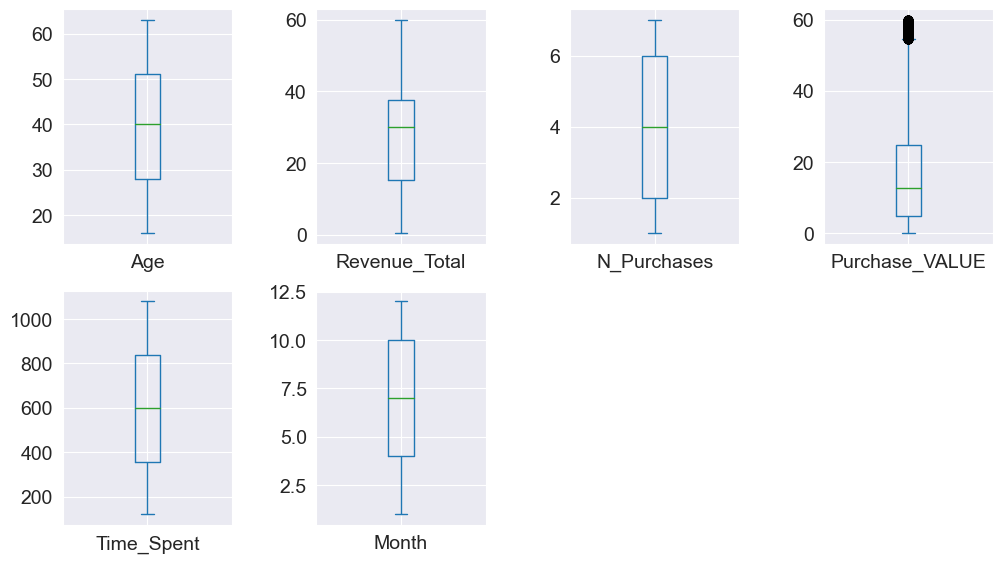

In [32]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))

plt.subplots_adjust(wspace=0.5)

Data Insight

Age

In [33]:
Subscribed = 'Subscribed'

- Age Range 20 - 40

Text(0.5, 0, 'Age from 20 - 40')

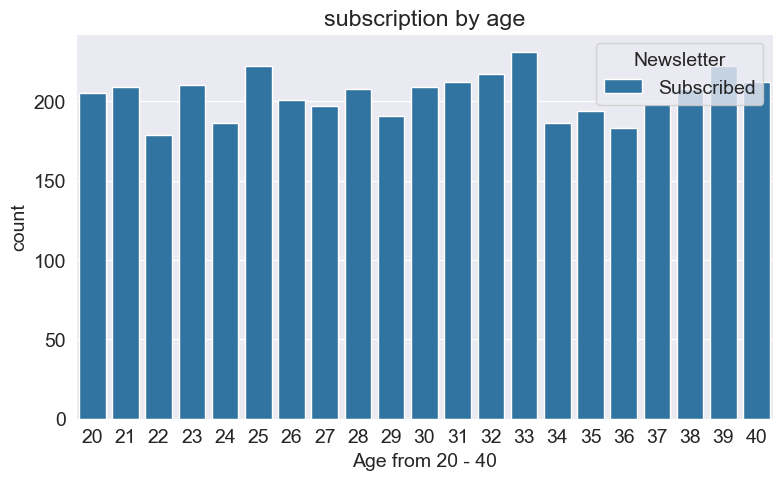

In [48]:
subsribed_value = df.query('Newsletter == @Subscribed').query('Age >= 20 and Age <= 40')

sns.countplot(data=subsribed_value, x='Age', hue='Newsletter')
plt.title('subscription by age')
plt.xlabel('Age from 20 - 40')


- Age Range 40 - 60

Text(0.5, 0, 'Age from 40 - 60')

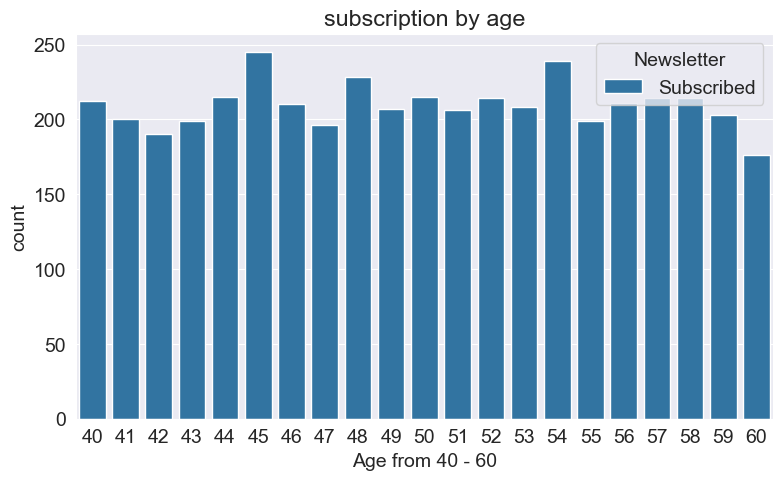

In [35]:
subsribed_value = df.query('Age >= 40 and Age <= 60').query('Newsletter == @Subscribed')
sns.countplot(x=subsribed_value['Age'], hue=subsribed_value['Newsletter'])
plt.title('subscription by age')
plt.xlabel('Age from 40 - 60')

Month

In [36]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Not Subscribed,Not Used,6
1,504309,18,Female,36.2,3,2021-10-12,2.896,PayPal,656,Chrome,Not Subscribed,Used,10
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used,10
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used,9


Text(0.5, 1.0, 'best month with subscription Customer')

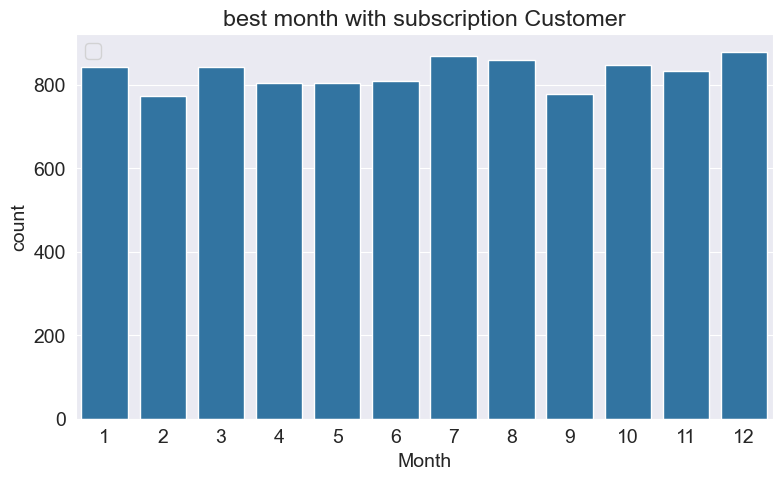

In [37]:
subsribed_value = df.query('Newsletter == @Subscribed')

sns.countplot(data=subsribed_value, x='Month', hue='Newsletter')
plt.legend('')
plt.title('best month with subscription Customer')

# people that already subscribed tend to shop in the 12th month

Question , The best month for sales?, How much was earned in month?

In [38]:
result = df.groupby(df['Month']).sum()
result

C:\Users\Ridho\AppData\Local\Temp\ipykernel_15012\3401470215.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby(df['Month']).sum()


,Customer_id,Age,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent
Month,,,,,,
1,3024773424,222932,155268.0,22582,89459.438,3366221
2,2729192976,200184,139984.8,20080,82065.269,3058621
3,2937309409,217280,152954.1,21790,89367.929,3261688
4,2903223034,213623,150555.0,21740,85409.355,3215469
5,3010114489,222137,154563.4,22460,87938.008,3364331
6,2929273980,214430,151084.0,21771,87737.820,3293998
7,2978460597,219476,153629.6,22069,87886.125,3267367
8,3023634178,223857,157115.4,22428,89494.439,3390884
9,2927082058,216768,149247.7,21982,85374.270,3263093


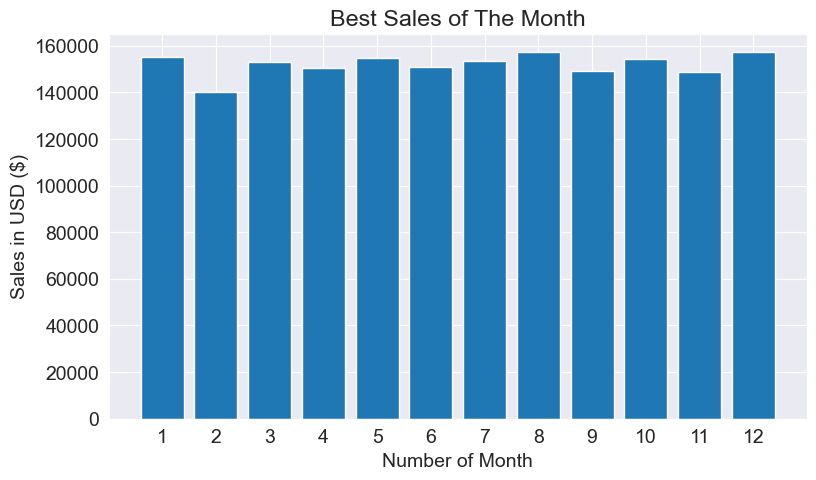

<Figure size 1200x1400 with 0 Axes>

In [39]:
month = range(1,13)

plt.xticks(month)
plt.bar(month, result['Revenue_Total'])
plt.xlabel('Number of Month')
plt.ylabel('Sales in USD ($)')
plt.title('Best Sales of The Month')
plt.figure(figsize=(12,14))
plt.show()

Browser

In [40]:
browser_highest = df.groupby(df['Browser']).sum()
browser_highest['Minute'] = browser_highest['Time_Spent'] / 60
browser_highest['Hour'] = browser_highest['Minute'] / 60
browser_highest['Hour'] = browser_highest['Hour'].astype('int32')
browser_highest['Minute'] = browser_highest['Minute'].astype('int32')
browser_highest

C:\Users\Ridho\AppData\Local\Temp\ipykernel_15012\599217738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  browser_highest = df.groupby(df['Browser']).sum()


,Customer_id,Age,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Month,Minute,Hour
Browser,,,,,,,,,
Chrome,22603852808,1662648,1170288.6,167532,673113.309,25167822,274590,419463,6991
Edge,1812170604,134478,92303.2,13550,53287.405,2026815,21783,33780,563
Other,3873074655,286303,200156.7,29151,115899.942,4317754,47143,71962,1199
Safari,7056875011,521612,361967.7,52456,208375.866,7894518,85865,131575,2192


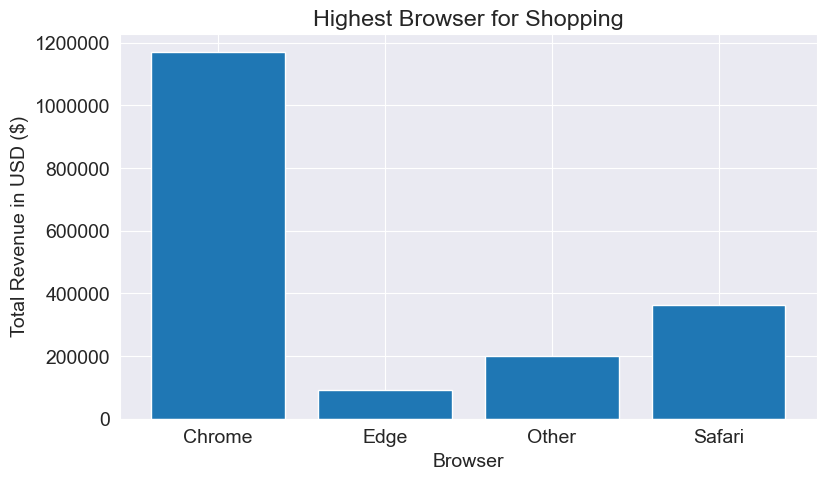

In [41]:
browser = [browsers for browsers, df in df.groupby('Browser')]

plt.bar(browser, browser_highest['Revenue_Total'])

plt.xticks(browser)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Browser')
plt.ylabel('Total Revenue in USD ($)')
plt.title('Highest Browser for Shopping')

plt.show()

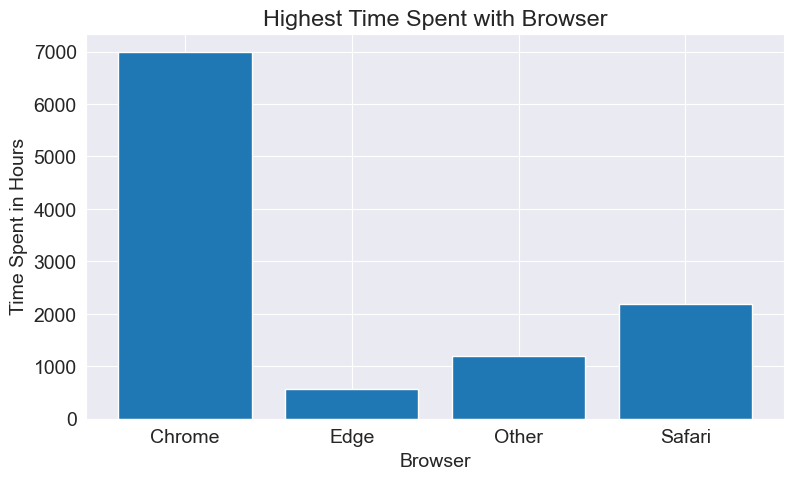

In [42]:
browser = [browsers for browsers, df in df.groupby('Browser')]

plt.bar(browser, browser_highest['Hour'])

plt.xticks(browser)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Browser')
plt.ylabel('Time Spent in Hours')
plt.title('Highest Time Spent with Browser')

plt.show()

In [49]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month
0,504308,53,Male,45.3,2,2021-06-22,24.915,Card,885,Chrome,Not Subscribed,Not Used,6
1,504309,18,Female,36.2,3,2021-10-12,2.896,PayPal,656,Chrome,Not Subscribed,Used,10
2,504310,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3
3,504311,29,Male,54.1,5,2021-10-25,43.280,Card,906,Chrome,Subscribed,Not Used,10
4,504312,21,Female,56.9,1,2021-09-14,56.900,Card,605,Chrome,Subscribed,Not Used,9


Gender

In [50]:
gender_group = df.groupby(df['Gender']).sum()

gender_group

C:\Users\Ridho\AppData\Local\Temp\ipykernel_15012\916460422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby(df['Gender']).sum()


,Customer_id,Age,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Month
Gender,,,,,,,
Female,23731801458,1749697,1224554.7,176447,704348.910,26469437,288203
Male,11614171620,855344,600161.5,86242,346327.612,12937472,141178


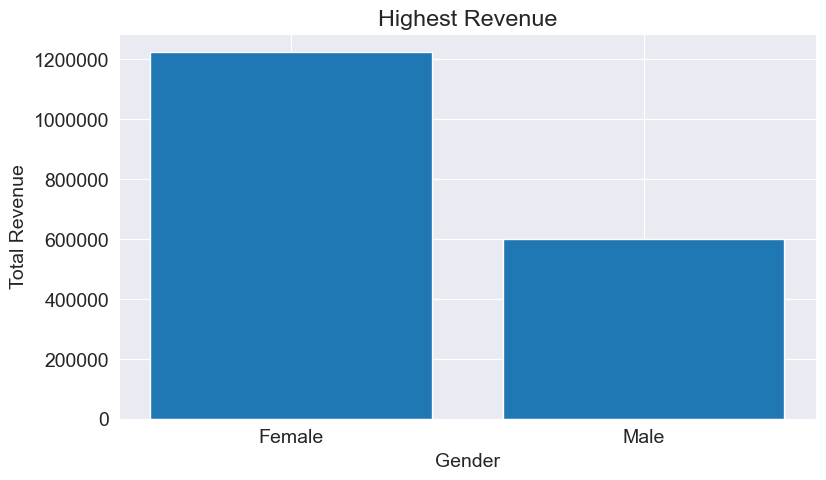

In [52]:
gender = [genders for genders, df in df.groupby('Gender')]

plt.bar(gender, gender_group['Revenue_Total'])

plt.xticks(gender)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.title('Highest Revenue')

plt.show()